In [ ]:
!pip install quandl
import quandl

In [33]:
api_key = 'AK6Hx-TEBPSS2q4xafkY'
quandl.ApiConfig.api_key = api_key

In [34]:
# Enter 5 stocks here.
stocks = input('Enter 5 stock tickers, separated by commas: ')
stocks = stocks.split(',')

for i in range(len(stocks)):
  stocks[i] = str(stocks[i])

Enter 5 stock tickers, separated by commasAAPL, GOOG, FB, GOLD, AMZN


In [36]:
table = quandl.get_table('WIKI/PRICES', ticker = stocks, 
                         qopts = {'columns': ['date', 'ticker', 'adj_close']},
                         date = {'gte': '2016-1-1', 'lte':'2016-12-31'}, paginate = True)
frame = table.set_index('date')
df = frame.pivot(columns = 'ticker')

df.columns = [col[1] for col in df.columns]

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def performance(weights, mean_returns, covmatrix):
  returns = 252 * np.sum(mean_returns * weights) 
  sdev = np.sqrt(252) * np.sqrt(np.dot(weights.T, np.dot(covmatrix, weights))) 
  return sdev, returns

In [13]:
def randoms(num, mean_returns, covmatrix, r_f):
  results = np.zeros((3, num))
  currentweight = []

  for i in range(num):
    weights = np.random.random(5)
    weights /= np.sum(weights)
    currentweight.append(weights)
    dev, expected = performance(weights, mean_returns, covmatrix)
    results[0,i] = dev
    results[1,i] = expected
    results[2,i] = (expected - r_f)/dev

  return results, currentweight

In [50]:
def display(mean_returns, covmatrix, num, r_f):
  results, weights = randoms(num, mean_returns, covmatrix, r_f)
  
  print('minimum return: ' + str(round(min(results[0,:]), 2)))
  print('maximum return: ' + str(round(max(results[0,:]), 2)))

  plt.scatter(results[0,:], results[1,:], c = results[2:,], cmap = 'BuPu', marker = 'o',
              s = 10, alpha = 0.3)
  plt.colorbar()
  plt.title('randomly generated portfolios')
  plt.xlabel('volatility')
  plt.ylabel('expected returns')

In [15]:
returns = df.pct_change()
mean_returns = returns.mean()
covmatrix = returns.cov()
r_f = 0.0183

minimum return: 0.17
maximum return: 0.33


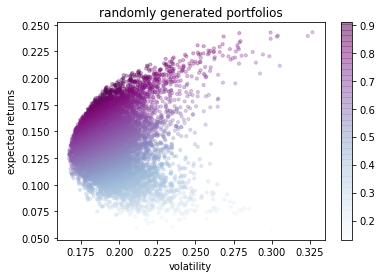

In [51]:
display(mean_returns, covmatrix, 10000, r_f)

In [78]:
def optimizer(seeking, num, mean_returns, covmatrix, r_f):
  results, weights = randoms(num, mean_returns, covmatrix, r_f)
  deviations = []
  weightings = []

  for i in range(num):
    if((round(results[0,i], 2)) == seeking):
      deviations.append(round(results[1,i], 2))
      weightings.append(weights[i])

  index = 0
  index = deviations.index(min(deviations))
  
  
  answer = weightings[index]
  
  print("You should invest the following weights of each stock to minimize volatility: ")
  dictionary = dict(zip(stocks, answer))
  print(dictionary)
 

In [79]:
answer1 = input('Enter an expected return between the min and max as a percentage. Example, enter 14 to see yield 14% return: ')

intpercent = float(answer1)
percent = round(intpercent/100, 2)
optimizer(percent, 10000, mean_returns, covmatrix, r_f)

Enter an expected return between the min and max as a percentage. Example, enter 14 to see yield 14% return: 25
You should invest the following weights of each stock to minimize volatility: 
{'AAPL': 0.09393258764629991, ' GOOG': 0.12805549413383988, ' FB': 0.02864016191375822, ' GOLD': 0.2023109671828295, ' AMZN': 0.5470607891232724}
